# Deep Learning based Email Spam Filter


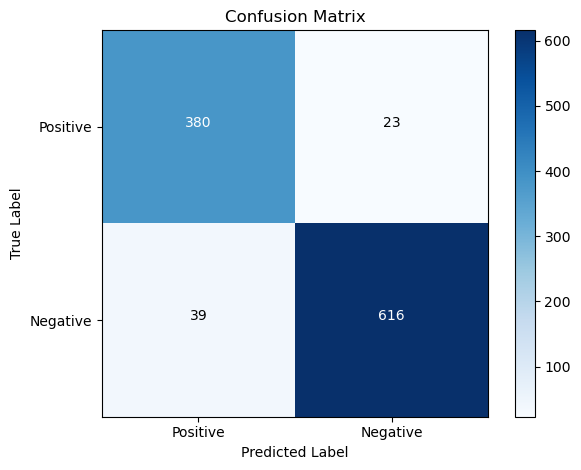

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion Matrix 값을 설정합니다.
confusion_matrix = np.array([[380, 23], [39, 616]])

# Confusion Matrix를 그립니다.
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ['Positive', 'Negative']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# 행렬 내의 값들을 표시합니다.
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# 그래프를 표시합니다.
plt.show()

In [2]:
TP = 380
FP = 23
FN = 39
TN = 616

# 재현율 (Recall) 계산
recall = TP / (TP + FN)

# 정밀도 (Precision) 계산
precision = TP / (TP + FP)

# 정확도 (Accuracy) 계산
accuracy = (TP + TN) / (TP + FP + FN + TN)

# 특이도 (Specificity) 계산
specificity = TN / (TN + FP)

# F1 Score 계산
f1_score = 2 * (precision * recall) / (precision + recall)

# 결과 출력
print(f"Recall (재현율): {recall:.4f}")
print(f"Precision (정밀도): {precision:.4f}")
print(f"Accuracy (정확도): {accuracy:.4f}")
print(f"Specificity (특이도): {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Recall (재현율): 0.9069
Precision (정밀도): 0.9429
Accuracy (정확도): 0.9414
Specificity (특이도): 0.9640
F1 Score: 0.9246


# 1. Preprocessing 

In [1]:
# Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sns
import sys
sys.setrecursionlimit(1500)
%matplotlib inline

# Preparing Enron Data 

In [2]:
data = pd.read_csv('최종데이터/collectimage_train_16features.csv')
data

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,"\nDiscount Pharmacy Online\nDo not click, type...",0.048061,0.032426,2,0.006472,0.348252,0.166091,0.324668,0.018486,0.121317,0.080300,0.034084,0.072745,0.008739,0.275551,0.311725,spam
1,\nAlmost 1000 low priced drugs from Canada ava...,0.241653,0.015791,1,0.186571,0.297876,0.206880,0.266667,0.022222,0.074074,0.066667,0.014815,0.104785,0.008501,0.013198,0.016585,spam
2,\nWOMEN WHO STEPPED UP WERE MEASURED AS CITIZE...,0.072774,0.069296,0,0.069563,0.409651,0.137319,0.339024,0.031707,0.139024,0.090244,0.019512,0.045443,0.004834,0.064864,0.062911,ham
3,\nFEURING\nMIUM\nFFEES!\nTA\nWelcome!\nleed YO...,0.118520,0.129737,2,0.120512,0.275123,0.108624,0.534170,0.022315,0.048815,0.062762,0.020921,0.062997,0.006822,0.081442,0.121237,spam
4,\n#NIGGA YOU CORNY!\nBEWARE\nGAP WHEN BOARDING...,0.149297,0.070245,0,0.348361,0.362141,0.262931,0.640000,0.000000,0.000000,0.040000,0.000000,0.009901,0.001082,0.003380,0.003070,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,\n- CLICK TO THE PICTURE -\nOnly Best quality ...,0.207269,0.433426,2,0.233912,0.297829,0.243351,0.471910,0.000000,0.056180,0.011236,0.022472,0.091309,0.008250,0.009818,0.011841,spam
5784,\nGDKI.PK IS POISED TO EXPLODE!\nTHIS ONE COUL...,0.148846,0.099371,2,0.309210,0.279829,0.150552,0.469388,0.017493,0.058309,0.040816,0.017493,0.080477,0.008726,0.040399,0.057848,spam
5785,\nOddel\n4\nPATRIO\n12\n65\nTROILI\nPATROTES\n...,0.069234,0.030466,4,0.025295,0.960949,0.114035,0.318807,0.022936,0.146789,0.087156,0.055046,0.113311,0.019651,0.055690,0.076865,ham
5786,\nBest stock Pick for this Year!\nGet ARSS Fir...,0.067179,0.042858,0,0.084392,0.343925,0.170447,0.336634,0.069307,0.135314,0.082508,0.036304,0.048955,0.005369,0.043296,0.049197,spam


We will add two more columns to our dataframe for tokenized text and token count. 

In [3]:
NEWLINE = '\n'

def token_count(row):
    'returns token count'
    text=row['tokenized_text']
    length=len(text.split())
    return length

def tokenize(row):
    "tokenize the text using default space tokenizer"
    text=row['text']
    lines=(line for line in text.split(NEWLINE) )
    tokenized=""
    for sentence in lines:
        tokenized+= " ".join(tok for tok in sentence.split())
    return tokenized

We will use apply functions on dataframe to add the columns for : 
    * Tokenized text
    * Token Count
    * Language
Language column in this case is not necessary as we only have english text. However this approach is good for properly dealing with multi lingual data.     

In [4]:
data['tokenized_text']=data.apply(tokenize, axis=1)
data['token_count']=data.apply(token_count, axis=1)
data['lang']='en'

Let's look at how our dataframe looks like

In [5]:
data.head()

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label,tokenized_text,token_count,lang
0,"\nDiscount Pharmacy Online\nDo not click, type...",0.048061,0.032426,2,0.006472,0.348252,0.166091,0.324668,0.018486,0.121317,0.080300,0.034084,0.072745,0.008739,0.275551,0.311725,spam,"Discount Pharmacy OnlineDo not click, type in ...",1507,en
1,\nAlmost 1000 low priced drugs from Canada ava...,0.241653,0.015791,1,0.186571,0.297876,0.206880,0.266667,0.022222,0.074074,0.066667,0.014815,0.104785,0.008501,0.013198,0.016585,spam,Almost 1000 low priced drugs from Canada avail...,71,en
2,\nWOMEN WHO STEPPED UP WERE MEASURED AS CITIZE...,0.072774,0.069296,0,0.069563,0.409651,0.137319,0.339024,0.031707,0.139024,0.090244,0.019512,0.045443,0.004834,0.064864,0.062911,ham,WOMEN WHO STEPPED UP WERE MEASURED AS CITIZENS...,370,en
3,\nFEURING\nMIUM\nFFEES!\nTA\nWelcome!\nleed YO...,0.118520,0.129737,2,0.120512,0.275123,0.108624,0.534170,0.022315,0.048815,0.062762,0.020921,0.062997,0.006822,0.081442,0.121237,spam,FEURINGMIUMFFEES!TAWelcome!leed YOUNGSTOWN TRA...,458,en
4,\n#NIGGA YOU CORNY!\nBEWARE\nGAP WHEN BOARDING...,0.149297,0.070245,0,0.348361,0.362141,0.262931,0.640000,0.000000,0.000000,0.040000,0.000000,0.009901,0.001082,0.003380,0.003070,spam,#NIGGA YOU CORNY!BEWAREGAP WHEN BOARDING softw...,20,en


In [6]:
# Lets look at some information related to the data
df=data
print("total emails : ", len(df))
print  ("total spam emails : ", len(df[df['label']=='spam']) )
print  ("total normal emails : ", len(df[df['label']=='ham']) )

total emails :  5788
total spam emails :  4404
total normal emails :  1384


### Plot of Emails with Langage and Email type

C:\Users\JAE\AppData\Local\Temp\ipykernel_10000\771743291.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['lang','label'])['label','lang'].size().unstack()


Text(0.5, 1.0, 'Plot of Emails count with languages and email type')

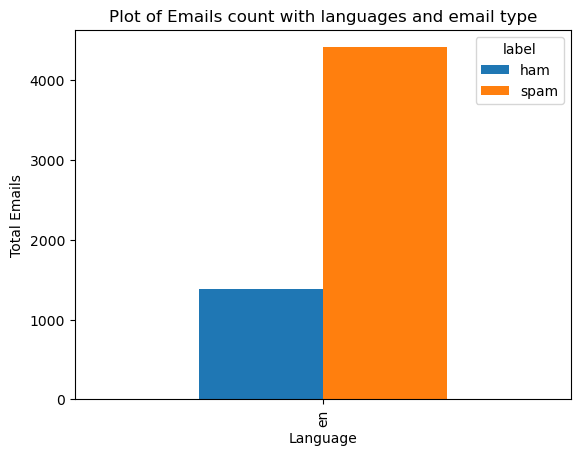

In [7]:
df1 = df.groupby(['lang','label'])['label','lang'].size().unstack()

ax=df1.plot(kind='bar')
ax.set_ylabel("Total Emails")
ax.set_xlabel("Language")
ax.set_title("Plot of Emails count with languages and email type")

Text(0.5, 1.0, 'Token length Vs Frequency for Enron Spam Emails')

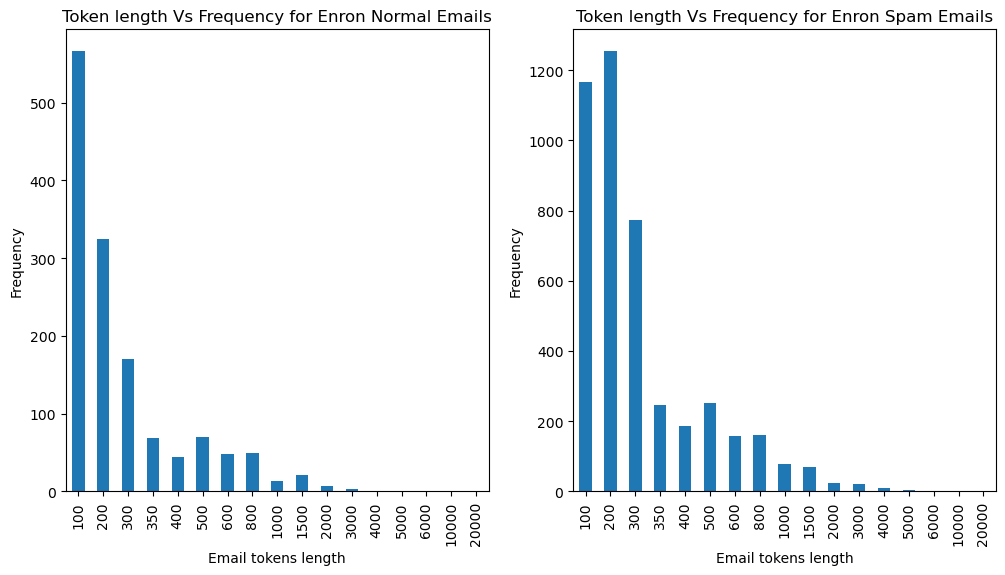

In [8]:
bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[ (df['lang']=='en') & (df['label']=='ham')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_sub=df[ (df['lang']=='en') & (df['label']=='spam')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

# Prepare training and test data 

We will split data into test data  and data for model training and validation. We do this step to keep test data out of both tf-idf and classifier models. 

We will keep 1000 emails for testing and rest for the model building process. 

# Train Machine Learning Models

## Deep Learning Model 

We will build our deep learning model using Keras library with tensorflow as backend. 

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, concatenate, Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard

# Create tf-idf model from the data

We will create tf-idf model with keras

In [10]:
# max number of features
num_max = 4000

In [11]:
def train_tf_idf_model(texts):
    "train tf idf model "
    tic = time.process_time()
    

    tok = Tokenizer(num_words=num_max)
    tok.fit_on_texts(texts)
    toc = time.process_time()

    print (" -----total Computation time = " + str((toc - tic)) + " seconds")
    return tok


def prepare_model_input(tfidf_model,dataframe,mode='tfidf'):
    
    "function to prepare data input features using tfidf model"
    tic = time.process_time()
    
    le = LabelEncoder()
    sample_texts = list(dataframe['tokenized_text'])
    sample_texts = [' '.join(x.split()) for x in sample_texts]
    
    targets=list(dataframe['label'])
    targets = [1. if x=='spam' else 0. for x in targets]
    sample_target = le.fit_transform(targets)
    
    if mode=='tfidf':
        sample_texts=tfidf_model.texts_to_matrix(sample_texts,mode='tfidf')
    else:
        sample_texts=tfidf_model.texts_to_matrix(sample_texts)
    
    toc = time.process_time()
    
    print('shape of labels: ', sample_target.shape)
    print('shape of data: ', sample_texts.shape)
    
    print (" -----total Computation time for preparing model data = " + str((toc - tic)) + " seconds")
    
    return sample_texts,sample_target

In [12]:
texts=list(df['tokenized_text'])
tfidf_model=train_tf_idf_model(texts)

 -----total Computation time = 2.25 seconds


In [13]:
# prepare model input data
mat_texts,tags = prepare_model_input(tfidf_model,df,mode='tfidf')

shape of labels:  (5788,)
shape of data:  (5788, 4000)
 -----total Computation time for preparing model data = 7.203125 seconds


In [14]:
df_model = df

In [15]:
special_ratio = np.array(df_model['special_ratio'])
number_ratio = np.array(df_model['number_ratio'])
url_count = np.array(df_model['url_count'])
upper_ratio = np.array(df_model['upper_ratio'])
blank_ratio = np.array(df_model['blank_ratio'])
crlf_ratio = np.array(df_model['crlf_ratio'])
Noun = np.array(df_model['Noun'])
Pronoun = np.array(df_model['Pronoun'])
Verb = np.array(df_model['Verb'])
Adjective = np.array(df_model['Adjective'])
Adverb = np.array(df_model['Adverb'])
avg_word_sentences = np.array(df_model['avg_word_sentences'])
avg_char_sentences = np.array(df_model['avg_char_sentences'])
avg_word_paragraphs = np.array(df_model['avg_word_paragraphs'])
avg_char_paragraphs = np.array(df_model['avg_char_paragraphs'])

# 텍스트 입력 레이어
text_input = Input(shape=(num_max,), name='text_input')

# 특수문자, 숫자 개수, URL 개수 입력 레이어
special_ratio_input = Input(shape=(1,), name='special_ratio_input')
number_ratio_input = Input(shape=(1,), name='number_ratio_input')
url_count_input = Input(shape=(1,), name='url_count_input')
upper_ratio_input = Input(shape=(1,), name='upper_ratio_input')
blank_ratio_input = Input(shape=(1,), name='blank_ratio_input')
crlf_ratio_input = Input(shape=(1,), name='crlf_ratio_input')
Noun_input = Input(shape=(1,), name='Noun_input')
Pronoun_input = Input(shape=(1,), name='Pronoun_input')
Verb_input = Input(shape=(1,), name='Verb_input')
Adjective_input = Input(shape=(1,), name='Adjective_input')
Adverb_input = Input(shape=(1,), name='Adverb_input')
avg_word_sentences_input = Input(shape=(1,), name='avg_word_sentences_input')
avg_char_sentences_input = Input(shape=(1,), name='avg_char_sentences_input')
avg_word_paragraphs_input = Input(shape=(1,), name='avg_word_paragraphs_input')
avg_char_paragraphs_input = Input(shape=(1,), name='avg_char_paragraphs_input')

# 텍스트 입력 레이어와 나머지 입력 레이어들을 결합
merged_input = concatenate([text_input, upper_ratio_input, blank_ratio_input, Noun_input, Pronoun_input])

# Split Train/validation data 

We will use 85% for training, 15% for validation. 

In [16]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5788 entries, 0 to 5787
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 5788 non-null   object 
 1   special_ratio        5788 non-null   float64
 2   number_ratio         5788 non-null   float64
 3   url_count            5788 non-null   int64  
 4   upper_ratio          5788 non-null   float64
 5   blank_ratio          5788 non-null   float64
 6   crlf_ratio           5788 non-null   float64
 7   Noun                 5788 non-null   float64
 8   Pronoun              5788 non-null   float64
 9   Verb                 5788 non-null   float64
 10  Adjective            5788 non-null   float64
 11  Adverb               5788 non-null   float64
 12  avg_word_sentences   5788 non-null   float64
 13  avg_char_sentences   5788 non-null   float64
 14  avg_word_paragraphs  5788 non-null   float64
 15  avg_char_paragraphs  5788 non-null   f

In [19]:
# 학습 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
text_train, text_val, special_ratio_train, special_ratio_val, number_ratio_train, number_ratio_val, url_count_train, url_count_val, upper_ratio_train, upper_ratio_val, blank_ratio_train, blank_ratio_val, crlf_ratio_train, crlf_ratio_val, Noun_train, Noun_val, Pronoun_train, Pronoun_val, Verb_train, Verb_val, Adjective_train, Adjective_val, Adverb_train, Adverb_val, avg_word_sentences_train, avg_word_sentences_val, avg_char_sentences_train, avg_char_sentences_val, avg_word_paragraphs_train, avg_word_paragraphs_val,avg_char_paragraphs_train, avg_char_paragraphs_val, tags_train, tags_val = train_test_split(mat_texts, special_ratio , number_ratio , url_count, upper_ratio , blank_ratio , crlf_ratio, Noun, Pronoun, Verb, Adjective, Adverb, avg_word_sentences , avg_char_sentences , avg_word_paragraphs ,avg_char_paragraphs , tags, test_size=0.15, random_state=42)

In [20]:
text_train

array([[0.        , 1.33446397, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.33446397, 0.76600423, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.76600423, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.05664393, 2.25657963, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.65403369, 2.13849956, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Build models



In [21]:
## Define and initialize the network
model_save_path="checkpoints/spam_detector_enron_model6.h5"

In [22]:
def get_simple_model():
    # 은닉층과 출력층 설정
    hidden_layer = Dense(64, activation='relu')(merged_input)
    output_layer = Dense(1, activation='sigmoid', name='output')(hidden_layer)

    # 모델 생성
    model = Model(inputs=[text_input, upper_ratio_input, blank_ratio_input, Noun_input, Pronoun_input], outputs=output_layer)

    # 모델 요약
    model.summary()

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print('compile done')
    return model


def check_model2(model,x_train,y_train,x_val,y_val,epochs=10):
    history=model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1,
                      shuffle=True,
                      validation_data=(x_val, y_val),
                      callbacks=[checkpointer, tensorboard]).history
    return history

# define checkpointer
checkpointer = ModelCheckpoint(filepath=model_save_path,
                               verbose=1,
                               save_best_only=True)    

# define tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)


# define the predict function for the deep learning model for later use
def predict(test_text, test_upper_ratio, test_blank_ratio, test_Noun, test_Pronoun):
    result=model.predict([test_text, test_upper_ratio, test_blank_ratio, test_Noun, test_Pronoun])
    prediction = [round(x[0]) for x in result]
    return prediction

In [23]:
# get the compiled model
model = get_simple_model()

# load history
# history=check_model(m,mat_texts,tags,epochs=10)
history=check_model2(model,[text_train, upper_ratio_train, blank_ratio_train, Noun_train, Pronoun_train], tags_train, [text_val, upper_ratio_val, blank_ratio_val, Noun_val, Pronoun_val], tags_val, epochs=10)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 4000)]               0         []                            
                                                                                                  
 upper_ratio_input (InputLa  [(None, 1)]                  0         []                            
 yer)                                                                                             
                                                                                                  
 blank_ratio_input (InputLa  [(None, 1)]                  0         []                            
 yer)                                                                                             
                                                                                              

C:\Users\JAE\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/77 [===========================>..] - ETA: 0s - loss: 0.0982 - accuracy: 0.9713
Epoch 2: val_loss improved from 0.18723 to 0.17841, saving model to checkpoints\spam_detector_enron_model6.h5
77/77 [==============================] - 1s 7ms/step - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.1784 - val_accuracy: 0.9310
Epoch 3/10
69/77 [=========================>....] - ETA: 0s - loss: 0.0618 - accuracy: 0.9857
Epoch 3: val_loss did not improve from 0.17841
77/77 [==============================] - 1s 7ms/step - loss: 0.0627 - accuracy: 0.9854 - val_loss: 0.2134 - val_accuracy: 0.9425
Epoch 4/10
74/77 [===========================>..] - ETA: 0s - loss: 0.0499 - accuracy: 0.9909
Epoch 4: val_loss did not improve from 0.17841
77/77 [==============================] - 1s 7ms/step - loss: 0.0498 - accuracy: 0.9911 - val_loss: 0.1877 - val_accuracy: 0.9356
Epoch 5/10
71/77 [==========================>...] - ETA: 0s - loss: 0.0404 - accuracy: 0.9921
Epoch 5: val_loss did not improve from 0.178

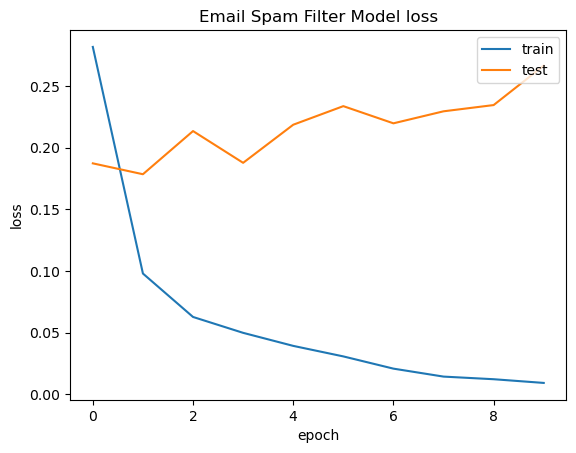

In [24]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

# Evaluate Model Performance

In [25]:
import sklearn
from sklearn import metrics
import joblib

## Lets prepare test data 

In [56]:
test_df = pd.read_csv("최종데이터/image_test_16features.csv")

In [57]:
test_df

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,\nADS FOR MONSTERS\nMADHOUSE SALUTES THE TRANS...,0.360624,0.000000,0,0.839181,0.770332,0.112719,0.727273,0.020202,0.040404,0.000000,0.010101,0.118940,0.123023,0.208877,0.202954,ham
1,\nBest stock Pick for this Year.\nGet ARSS Fir...,0.365934,0.081319,0,0.155449,0.965918,0.033690,0.343750,0.056250,0.125000,0.056250,0.037500,0.151835,0.136961,0.336815,0.282039,spam
2,\n• Lowest Price Guarantee Fast Delivery\nFor ...,0.452138,0.361711,3,0.102172,0.686488,0.268455,0.447917,0.020833,0.125000,0.010417,0.052083,0.859729,0.908068,0.214099,0.191520,spam
3,\nLOUIS VUITTON\nPARIS\nmade in France,0.000000,0.000000,0,0.600000,0.498126,0.480349,0.666667,0.000000,0.166667,0.000000,0.000000,0.045249,0.052533,0.013055,0.010958,ham
4,\n• Lowest Price Guarantee Fast Delivery\nFor ...,0.544482,0.445485,2,0.113155,0.777455,0.182431,0.389831,0.033898,0.084746,0.033898,0.050847,0.524887,0.547842,0.130548,0.115293,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,\nNERDS ANONYMOUS\nCreated by Jared Bonner and...,0.397472,0.093523,2,0.088468,0.734468,0.025748,0.448598,0.018692,0.112150,0.046729,0.018692,0.233032,0.282364,0.224543,0.257265,ham
58,\nCANAL DE PANAMA\nABIER\nMIRAFLORES LOCKS PAN...,0.000000,0.129825,0,0.900585,0.509779,0.385729,0.888889,0.000000,0.000000,0.000000,0.000000,0.072398,0.093809,0.020888,0.020010,ham
59,\nLowest Price Guarantee & Fast Delivery\n100%...,0.502642,0.432830,3,0.107862,0.800448,0.165216,0.425926,0.018519,0.111111,0.018519,0.037037,0.479638,0.483114,0.234987,0.206289,spam
60,\nWATCH OUT!\nSBNS MAKES A MOVE!\nWATCH SBNS T...,0.314678,0.071056,0,0.387289,0.829072,0.075351,0.592857,0.000000,0.028571,0.021429,0.014286,0.106129,0.109500,0.305483,0.288232,spam


In [58]:
test_df['tokenized_text']=test_df.apply(tokenize, axis=1)
test_df['token_count']=test_df.apply(token_count, axis=1)
test_df['lang']='en'

In [59]:
# prepare model input data
sample_texts,sample_target = prepare_model_input(tfidf_model,test_df,mode='tfidf')

shape of labels:  (62,)
shape of data:  (62, 4000)
 -----total Computation time for preparing model data = 0.03125 seconds


In [60]:
special_ratio_test = np.array(test_df['special_ratio'])
number_ratio_test = np.array(test_df['number_ratio'])
url_count_test = np.array(test_df['url_count'])
upper_ratio_test = np.array(test_df['upper_ratio'])
blank_ratio_test = np.array(test_df['blank_ratio'])
crlf_ratio_test = np.array(test_df['crlf_ratio'])
Noun_test = np.array(test_df['Noun'])
Pronoun_test = np.array(test_df['Pronoun'])
Verb_test = np.array(test_df['Verb'])
Adjective_test = np.array(test_df['Adjective'])
Adverb_test = np.array(test_df['Adverb'])
avg_word_sentences_test = np.array(test_df['avg_word_sentences'])
avg_char_sentences_test = np.array(test_df['avg_char_sentences'])
avg_word_paragraphs_test = np.array(test_df['avg_word_paragraphs'])
avg_char_paragraphs_test = np.array(test_df['avg_char_paragraphs'])

In [61]:
# lets write a function to create the dataframe of the results from all the models

model_dict={}
model_dict['deep_learning']=model


def getResults(model_dict, sample_texts, upper_ratio, blank_ratio, Noun, Pronoun, sample_target):
    '''
    Get results from different models
    '''
    results=[]
    
    results_cm={}
    
    for name,model in model_dict.items():
#         print(name)
        tic1 = time.process_time()
        if name in 'deep_learning':
            predicted_sample = predict(sample_texts, upper_ratio, blank_ratio, Noun, Pronoun)
        else:    
            predicted_sample = model.predict(sample_texts, upper_ratio, blank_ratio, Noun, Pronoun)
        toc1 = time.process_time()
#         print(predicted_sample)

        cm=sklearn.metrics.confusion_matrix(sample_target, predicted_sample)
        results_cm[name]=cm
        
        total=len(predicted_sample)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        
        time_taken=round(toc1 - tic1,4)
        res=sklearn.metrics.precision_recall_fscore_support(sample_target, predicted_sample)
        results.append([name,np.mean(res[0]),np.mean(res[1]),np.mean(res[2]),total,TP,FP,FN,TN,str(time_taken)] )     
        
    
    df_cols=['model','precision','recall','f1_score','Total_samples','TP','FP','FN','TN','execution_time']
    result_df=pd.DataFrame(results,columns=df_cols)
    
    return result_df,results_cm

## Results

In [62]:
result_df,results_cm= getResults(model_dict, sample_texts, upper_ratio_test , blank_ratio_test , Noun_test, Pronoun_test, sample_target)
result_df

2/2 [==============================] - 0s 14ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.926471,0.924242,0.919334,62,28,5,0,29,0.1406


As we see, deep learning model does very well on the test data. The results from other models are close. I have tried this approach over multiple language emails and deep learning model is very consistent with the performance. XGboost also does very well. Please note that i have not optimized random forest and SVM much beyond the defaults. So they may have better performance with tuning. 


### Plot confusion Matrix for all the models

In [33]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['normal', 'spam'])
    df_cm2.columns=['normal','spam']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()
    return

### CM for Deep Learning Model

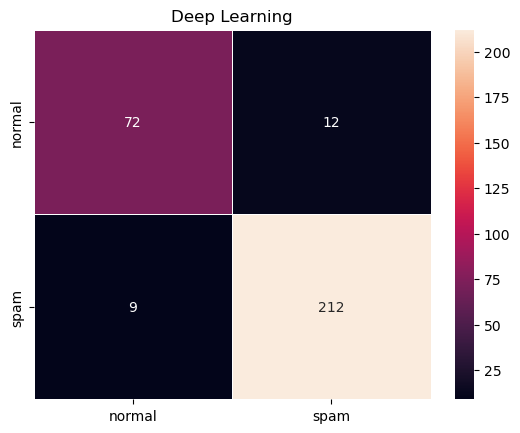

In [34]:
plot_heatmap(results_cm['deep_learning'],'Deep Learning')

# 다른 테스트 셋